In [195]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
df = pd.read_csv("column_3C.dat", sep = " ", header = None)
df

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [127]:
X = df.iloc[:, :6].values
y = df.iloc[:, -1].values
le = preprocessing.LabelEncoder()
labels = le.fit_transform(y)

In [128]:
#Denoising

# calculate IQR for each feature
Q1 = np.percentile(X, 25, axis=0)
Q3 = np.percentile(X, 75, axis=0)
IQR = Q3 - Q1

# identify outliers using IQR rule
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = (X < lower) | (X > upper)

# remove outlier rows from the data and labels
clean_X = X[~np.any(outliers, axis=1)]
clean_y = y[~np.any(outliers, axis=1)]

# create a new DataFrame with the cleaned data and labels
clean_data = pd.DataFrame(data=clean_X, columns=df.columns[:-1])
clean_data['label'] = clean_y

# extract features and labels from the cleaned data
X = clean_data.iloc[:, :-1].values
y = clean_data.iloc[:, -1].values

In [129]:
#Normalizing

# apply min-max scaling to normalize the features
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

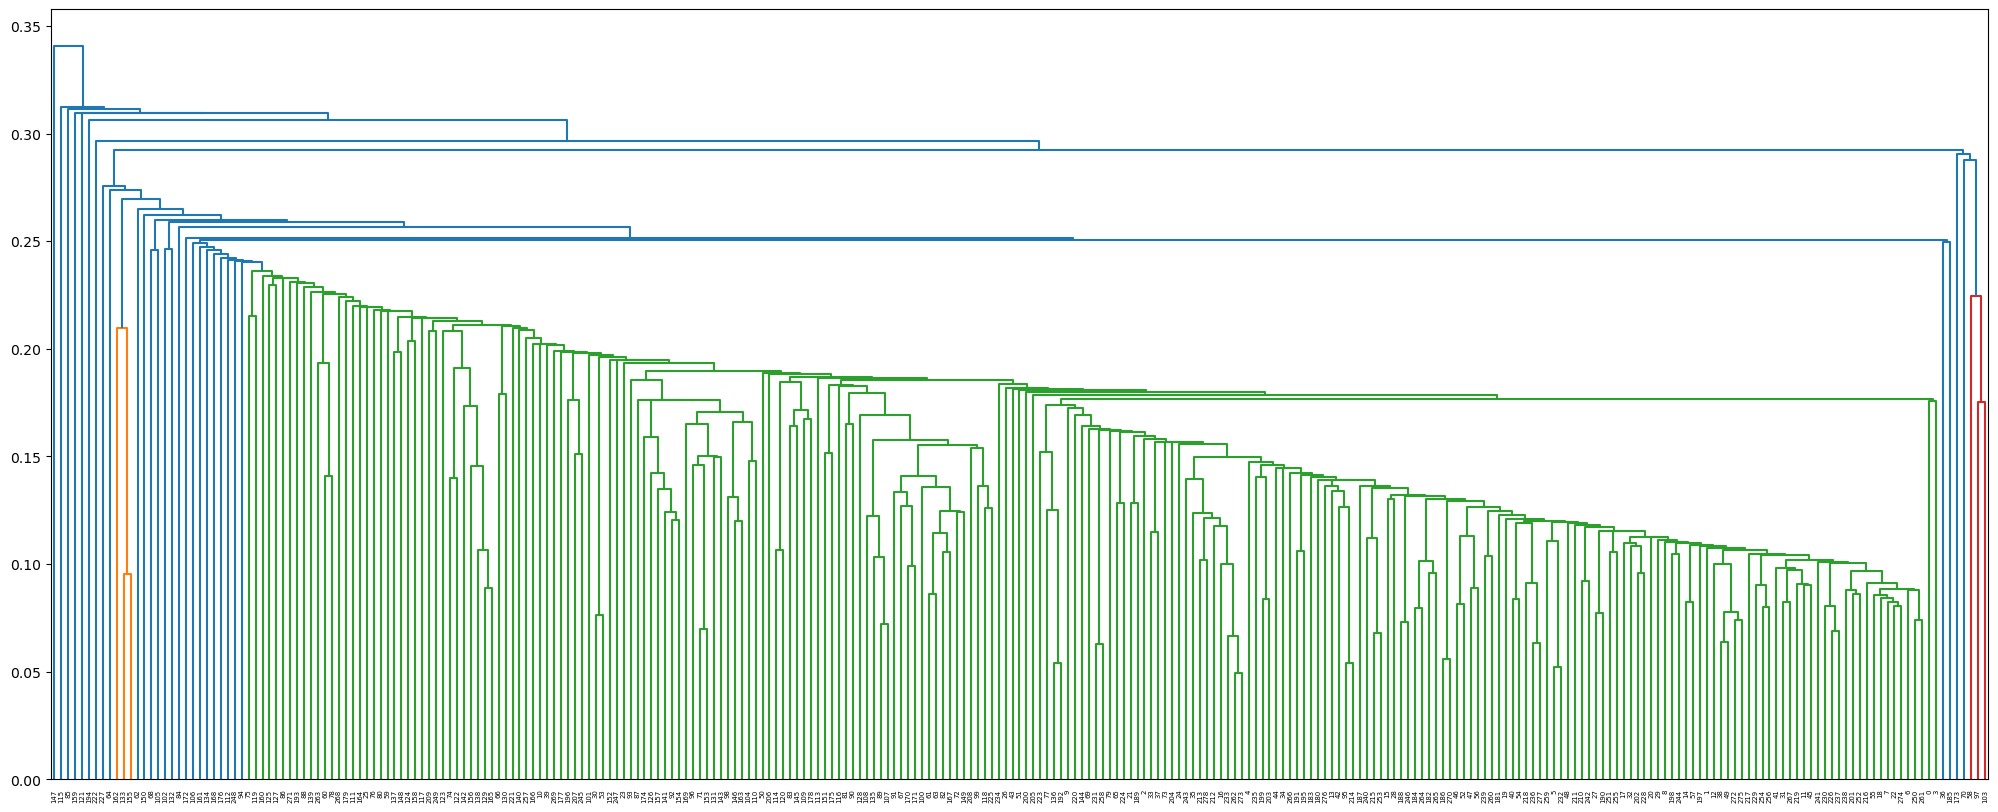

In [169]:
Z1 = linkage(X, method='single')
plt.figure(figsize=(25, 10))
dendrogram(Z1)
plt.show()

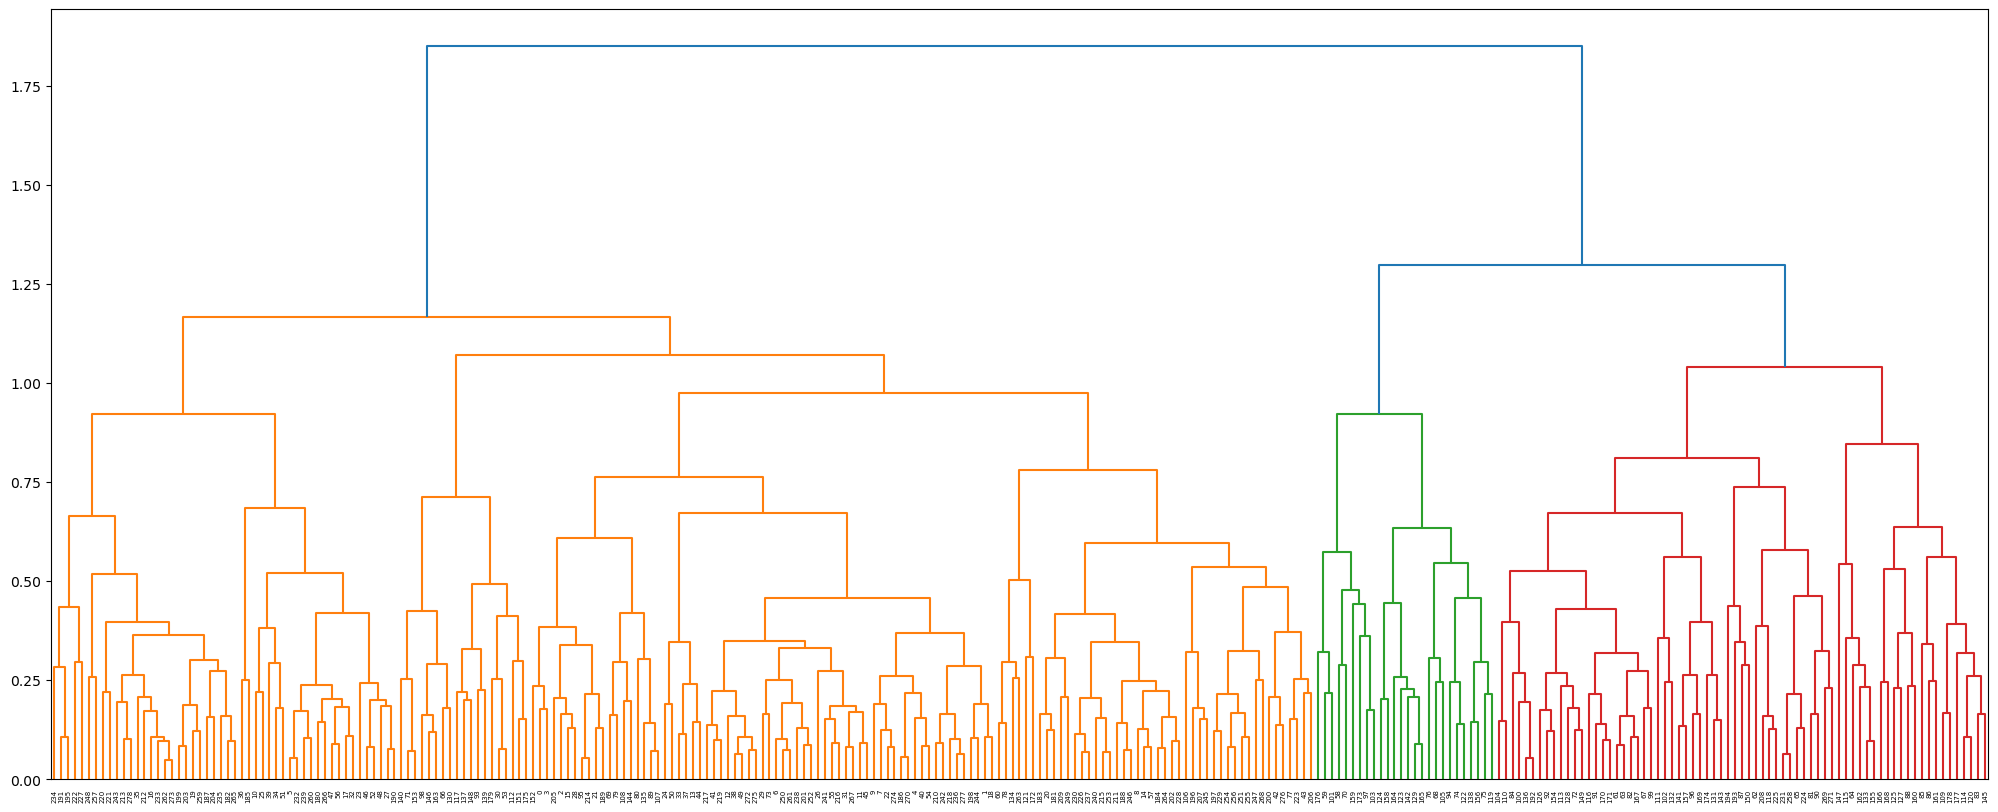

In [170]:
Z2 = linkage(X, method='complete')
plt.figure(figsize=(25, 10))
dendrogram(Z2)
plt.show()

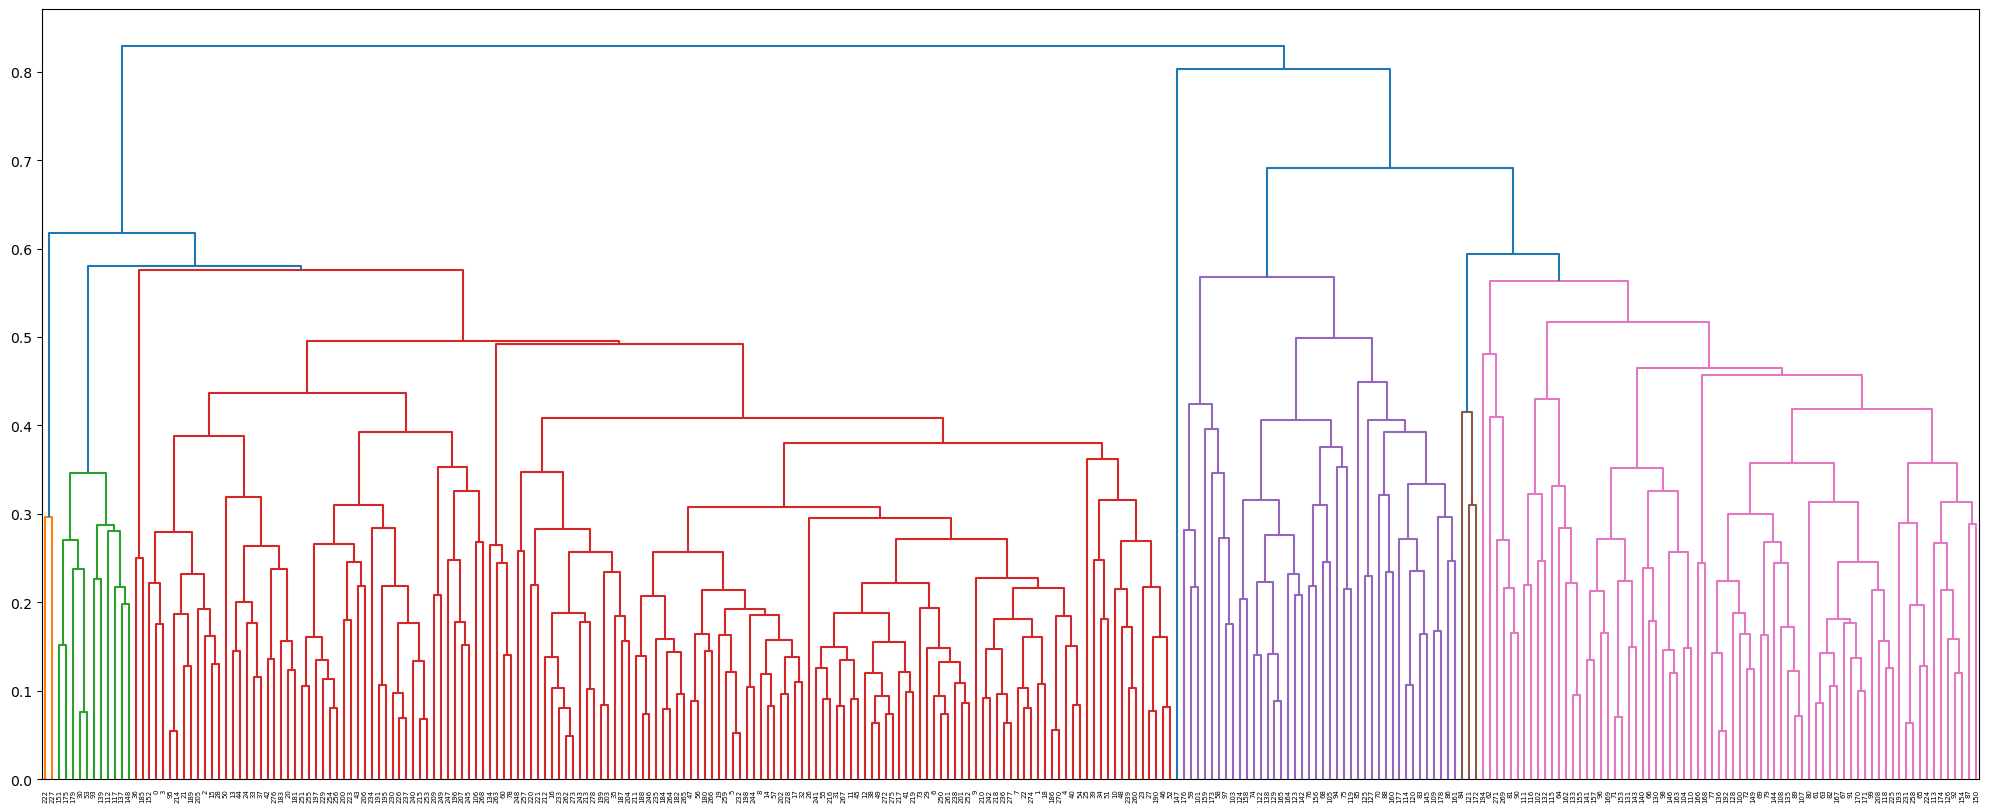

In [172]:
Z3 = linkage(X, method='average')
plt.figure(figsize=(25, 10))
dendrogram(Z3)
plt.show()

0: 0.04918801439488036
30: 0.08569787982812146
60: 0.10436102492003715
90: 0.11921301683260668
120: 0.13514466032312297
150: 0.15523727112740698
180: 0.17628747033643874
210: 0.1987652137755712
240: 0.2294662414305509
270: 0.2923928657185842
277: 0.34076049719162604


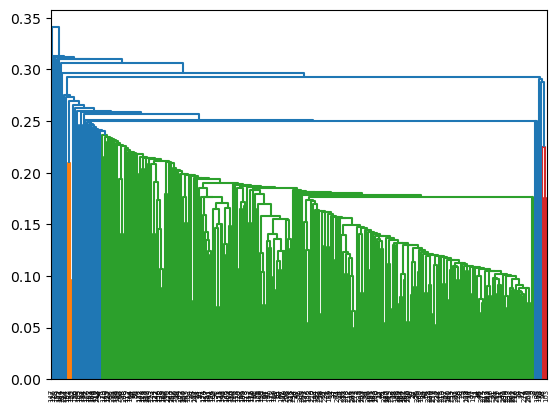

In [174]:
dendrogram_info = dendrogram(Z1)
distances = dendrogram_info['dcoord']
dist1 = [sublist[1] for sublist in distances]
dist1.sort()
for i in range(0, len(dist1), 30):
    print(f"{i}: {dist1[i]}")
print(f"{len(dist1)-1}: {dist1[len(dist1)-1]}")

0: 0.04918801439488036
30: 0.09108590544381336
60: 0.12603242227050798
90: 0.15996610925722998
120: 0.1924516646727143
150: 0.23113989008996583
180: 0.2721287192254746
210: 0.3452772518765846
240: 0.46250042283697324
270: 0.9215970334646836
277: 1.8511600917038993


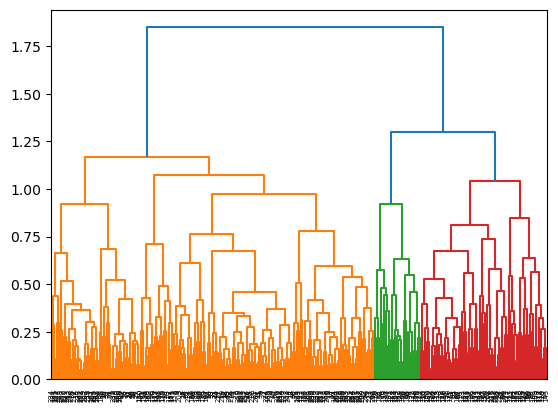

In [176]:
dendrogram_info = dendrogram(Z2)
distances = dendrogram_info['dcoord']
dist2 = [sublist[1] for sublist in distances]
dist2.sort()
for i in range(0, len(dist2), 30):
    print(f"{i}: {dist2[i]}")
print(f"{len(dist2)-1}: {dist2[len(dist2)-1]}")

0: 0.04918801439488036
30: 0.09029086152014396
60: 0.12087491769233158
90: 0.1478513637179405
120: 0.17646446161074328
150: 0.21446501629294767
180: 0.24405655921005268
210: 0.28115647657782944
240: 0.3520088495650484
270: 0.5678007963157053
277: 0.8293583958823753


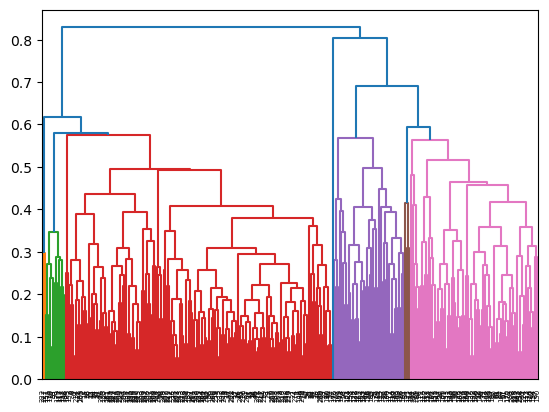

In [177]:
dendrogram_info = dendrogram(Z3)
distances = dendrogram_info['dcoord']
dist3 = [sublist[1] for sublist in distances]
dist3.sort()
for i in range(0, len(dist3), 30):
    print(f"{i}: {dist3[i]}")
print(f"{len(dist3)-1}: {dist3[len(dist3)-1]}")

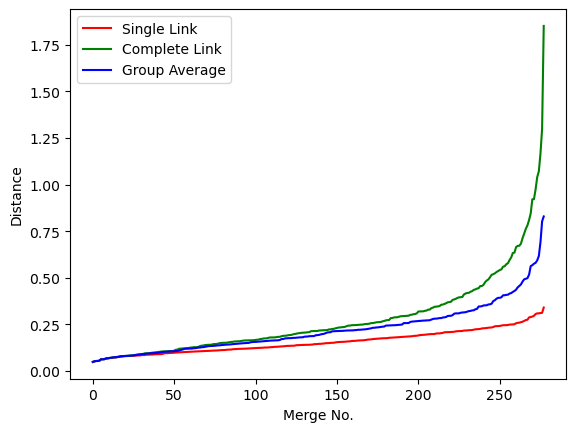

In [178]:
arr = np.arange(278)
plt.plot(arr, dist1, color='red', label='Single Link')
plt.plot(arr, dist2, color='green', label='Complete Link')
plt.plot(arr, dist3, color='blue', label='Group Average')
plt.xlabel('Merge No.')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [216]:
kclusters1 = fcluster(Z1, 3, criterion='maxclust')
kclusters1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [217]:
kclusters2 = fcluster(Z2, 3, criterion='maxclust')
kclusters2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 2, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 1, 2, 1, 3, 2, 1, 3, 3, 2, 3, 2, 3, 2, 1, 1, 1, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 2, 3, 1, 2, 2, 2, 3, 3, 3, 3, 2, 1, 3,
       3, 3, 1, 1, 3, 1, 2, 1, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1,
       3, 3, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 3, 1,
       2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [218]:
kclusters3 = fcluster(Z3, 3, criterion='maxclust')
kclusters3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [219]:
def mapping(x):
    if x == 0: return 1
    elif x == 1: return 2
    else: return 3

km = KMeans(n_clusters=3)
km.fit(X)
km_arr = map(mapping, km.labels_)
km_arr = list(km_arr)

In [241]:
def mapping(x):
    if x == "NO": return 1
    elif x == "DH": return 2
    else: return 3
    
true_labels = map(mapping, y)
true_labels = list(true_labels)

In [242]:
ari_hierarchical1 = adjusted_rand_score(true_labels, list(kclusters1))
ari_hierarchical2 = adjusted_rand_score(true_labels, list(kclusters2))
ari_hierarchical3 = adjusted_rand_score(true_labels, list(kclusters3))
ari_kmeans = adjusted_rand_score(true_labels, km_arr)
print(ari_hierarchical1)
print(ari_hierarchical2)
print(ari_hierarchical3)
print(ari_kmeans)

-0.0034189681939089224
0.15090387205592515
0.4226678433561648
0.27524928160850337


In [247]:
x1 = [[sublist[0], sublist[1], sublist[2]] for sublist in X]
print(x1)

[[0.5230463764005107, 0.6367713004484304, 0.2952501729305972], [0.18309459651113325, 0.35672645739910314, 0.1270463454000461], [0.6053042121684868, 0.6293721973094171, 0.4160710168319115], [0.6119699333427883, 0.6838565022421524, 0.34943509338252254], [0.3341370018437102, 0.3475336322869955, 0.16509107678118518], [0.19997163522904557, 0.44327354260089685, 0.12819921604795945], [0.38689547581903283, 0.4867713004484305, 0.2671201291215126], [0.27258544887250036, 0.3724215246636771, 0.17339174544616093], [0.2501772798184655, 0.43452914798206277, 0.3307585888863269], [0.3341370018437102, 0.42354260089686097, 0.1997924832833756], [0.07204651822436538, 0.5284753363228699, 0.017293059718699565], [0.32293291731669277, 0.5786995515695068, 0.30274383214203365], [0.38888100978584605, 0.5899103139013453, 0.22019829375144112], [0.44178130761594103, 0.6735426008968609, 0.3804473138113904], [0.2576939441214013, 0.4123318385650224, 0.25478441318884026], [0.5343922847823005, 0.5876681614349776, 0.46748

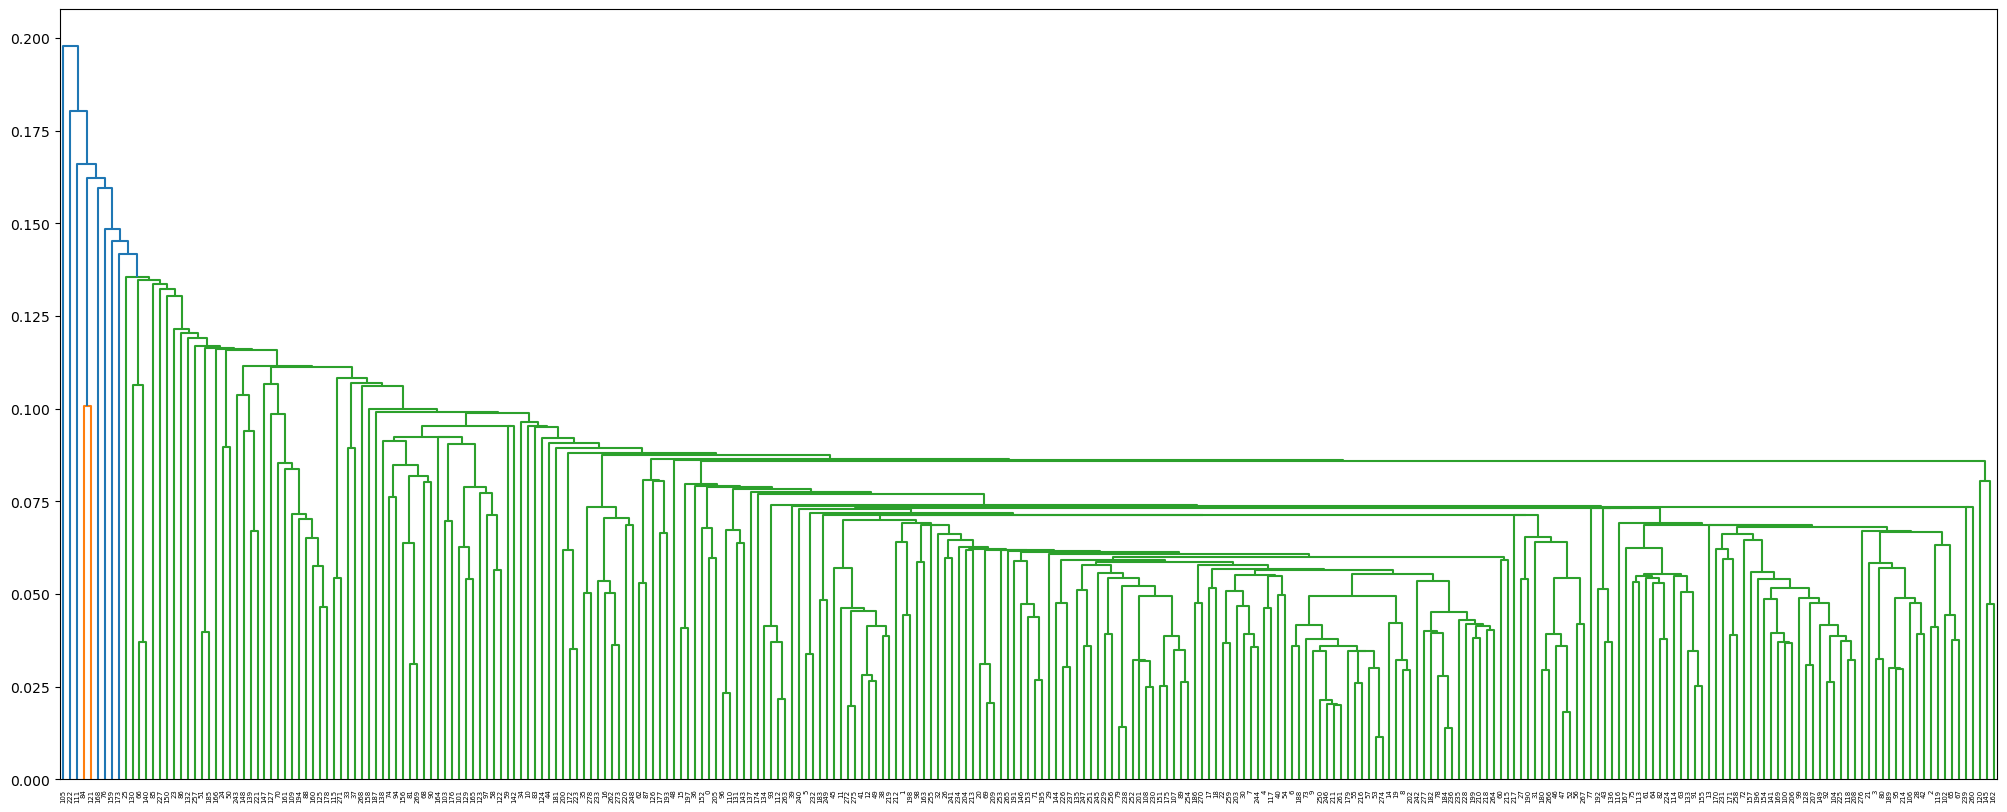

In [249]:
z1 = linkage(x1, method='single')
plt.figure(figsize=(25, 10))
dendrogram(z1)
plt.show()

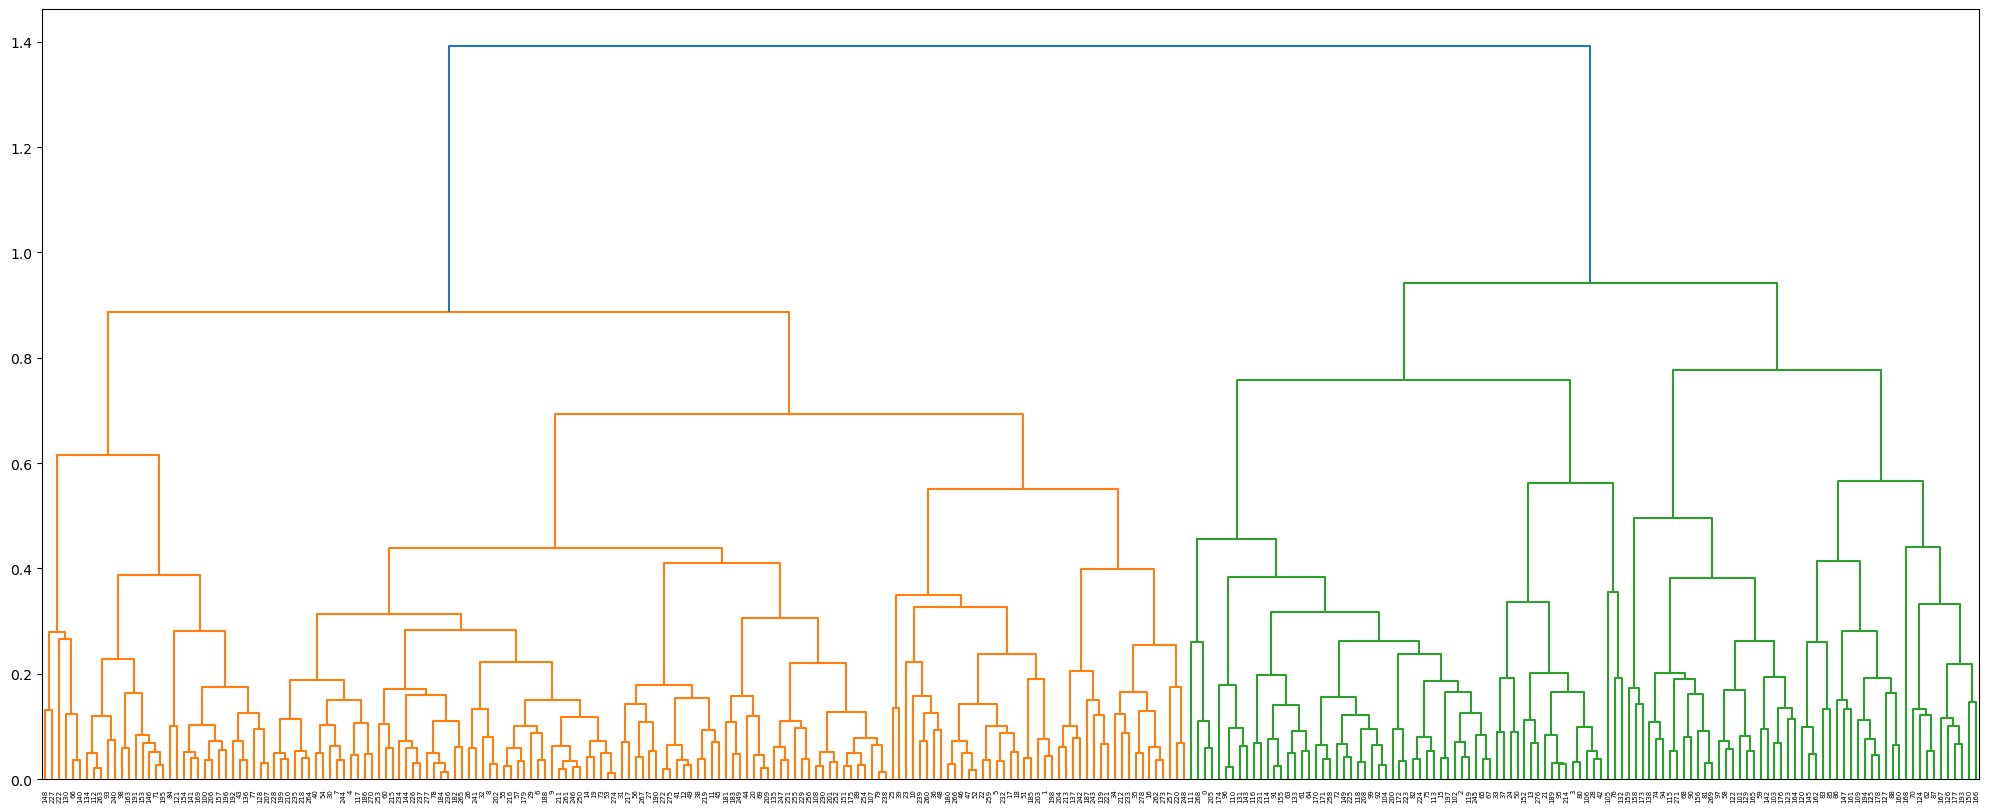

In [251]:
z2 = linkage(x1, method='complete')
plt.figure(figsize=(25, 10))
dendrogram(z2)
plt.show()

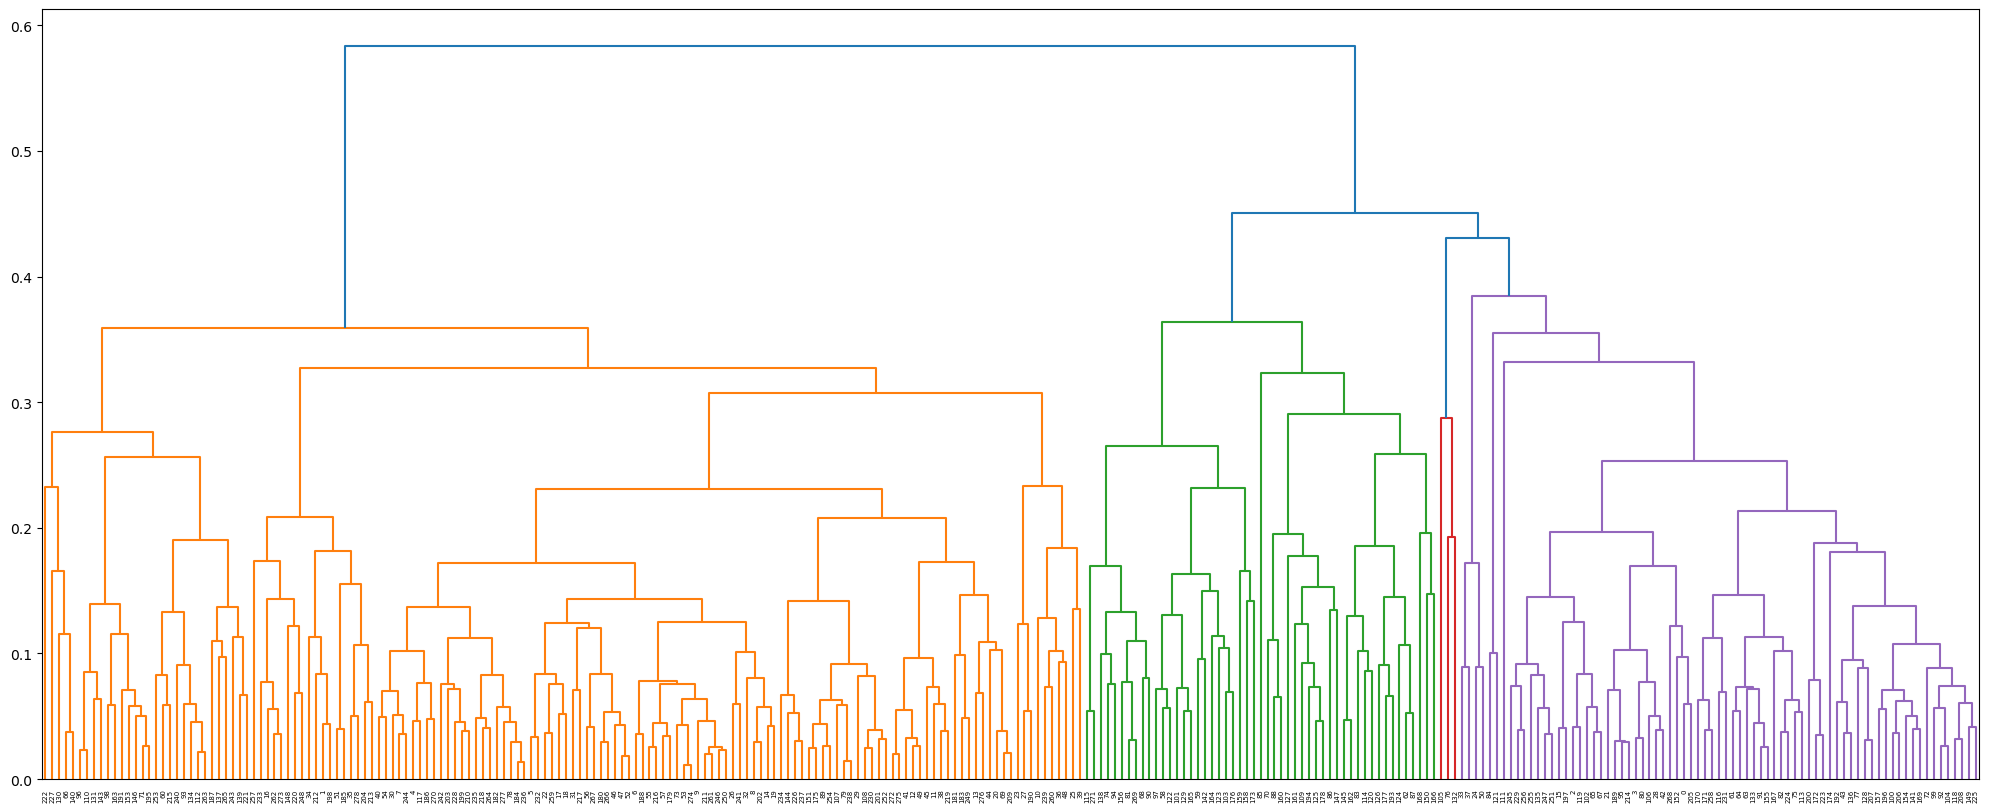

In [252]:
z3 = linkage(x1, method='average')
plt.figure(figsize=(25, 10))
dendrogram(z3)
plt.show()

In [253]:
x2 = [[sublist[3], sublist[4], sublist[5]] for sublist in X]
print(x2)

[[0.41439926627942525, 0.16628175519630486, 0.09708127525819488], [0.23891776215224703, 0.4459051341268431, 0.14027840143691064], [0.5081014980128401, 0.2963226150293124, 0.0676246070947463], [0.47798838275756655, 0.22313021851128093, 0.2], [0.4079792112503822, 0.33505063066263996, 0.17045352492141894], [0.19810455518190154, 0.7287262391188492, 0.11935339021104625], [0.3699174564353409, 0.5553384260081718, 0.15312079030085315], [0.3246713543258942, 0.4967134482146029, 0.0034126627750336843], [0.2581779272393763, 0.6340380174098419, 0.21867983834755275], [0.35616019565882, 0.34357790015988643, 0.029007633587786262], [0.002292876796086829, 0.5462782021673478, 0.10381679389312977], [0.23815346988688474, 0.5331319950257594, 0.17144140098787605], [0.301742586365026, 0.3847930360632439, 0.162550516389762], [0.301742586365026, 0.4885414816130752, 0.1511450381679389], [0.2814124121063895, 0.6184046899982236, 0.14800179613830264], [0.4601039437480893, 0.4085983300763902, 0.09375841939829367], [

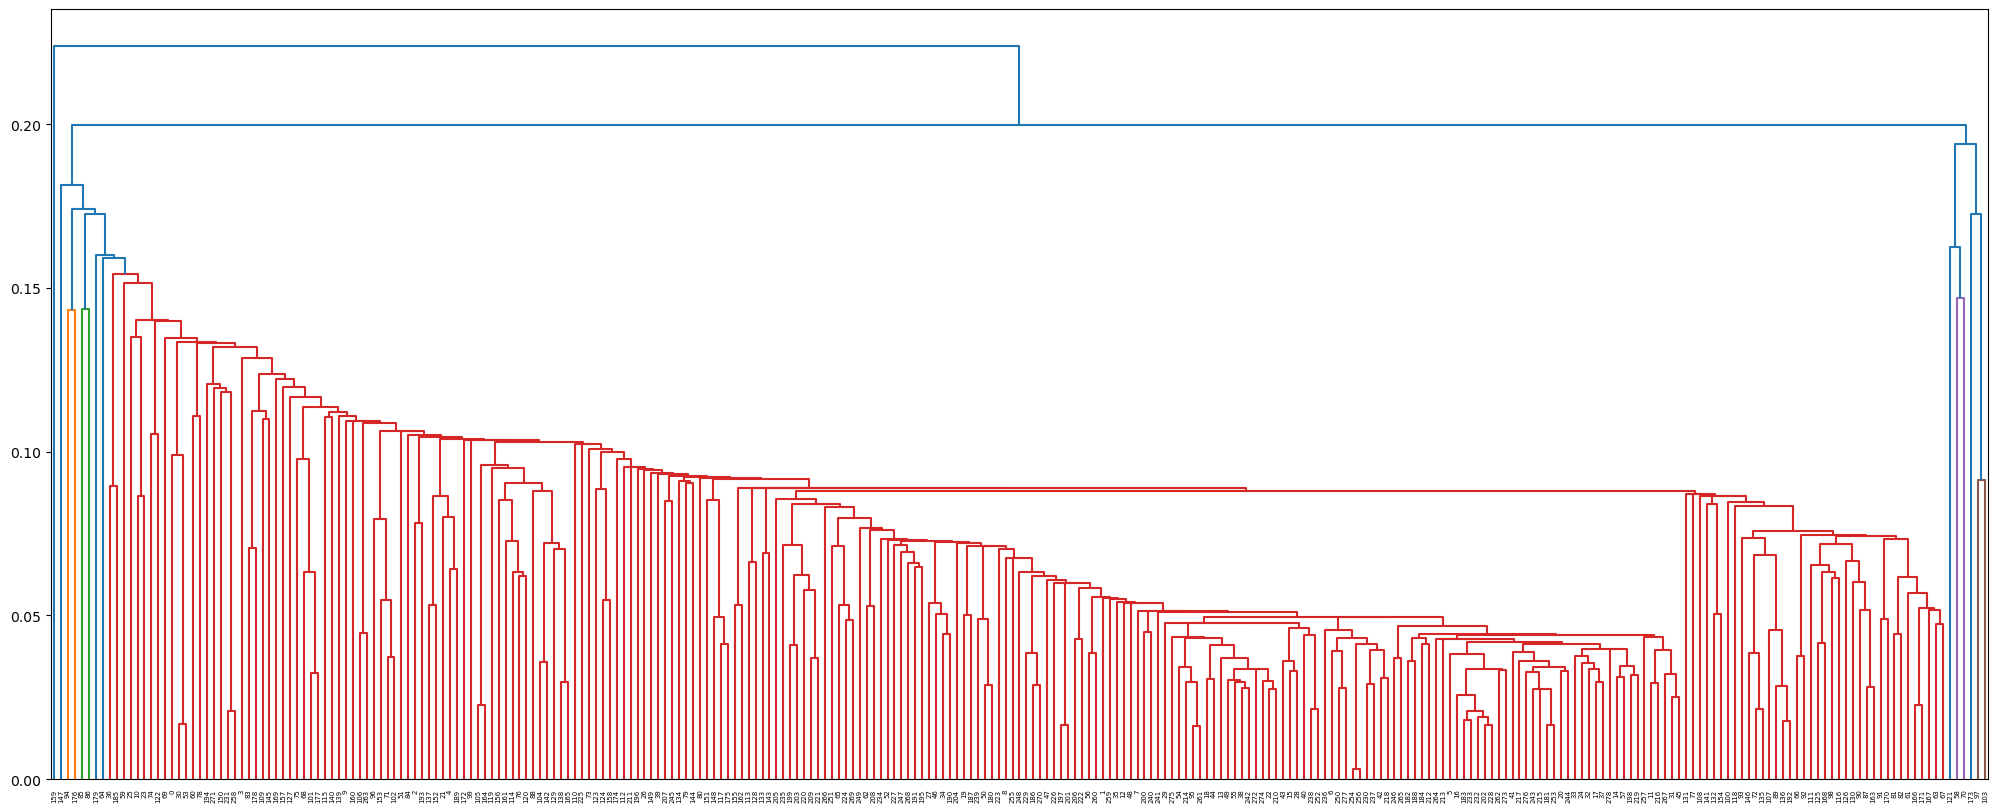

In [256]:
z1 = linkage(x2, method='single')
plt.figure(figsize=(25, 10))
dendrogram(z1)
plt.show()

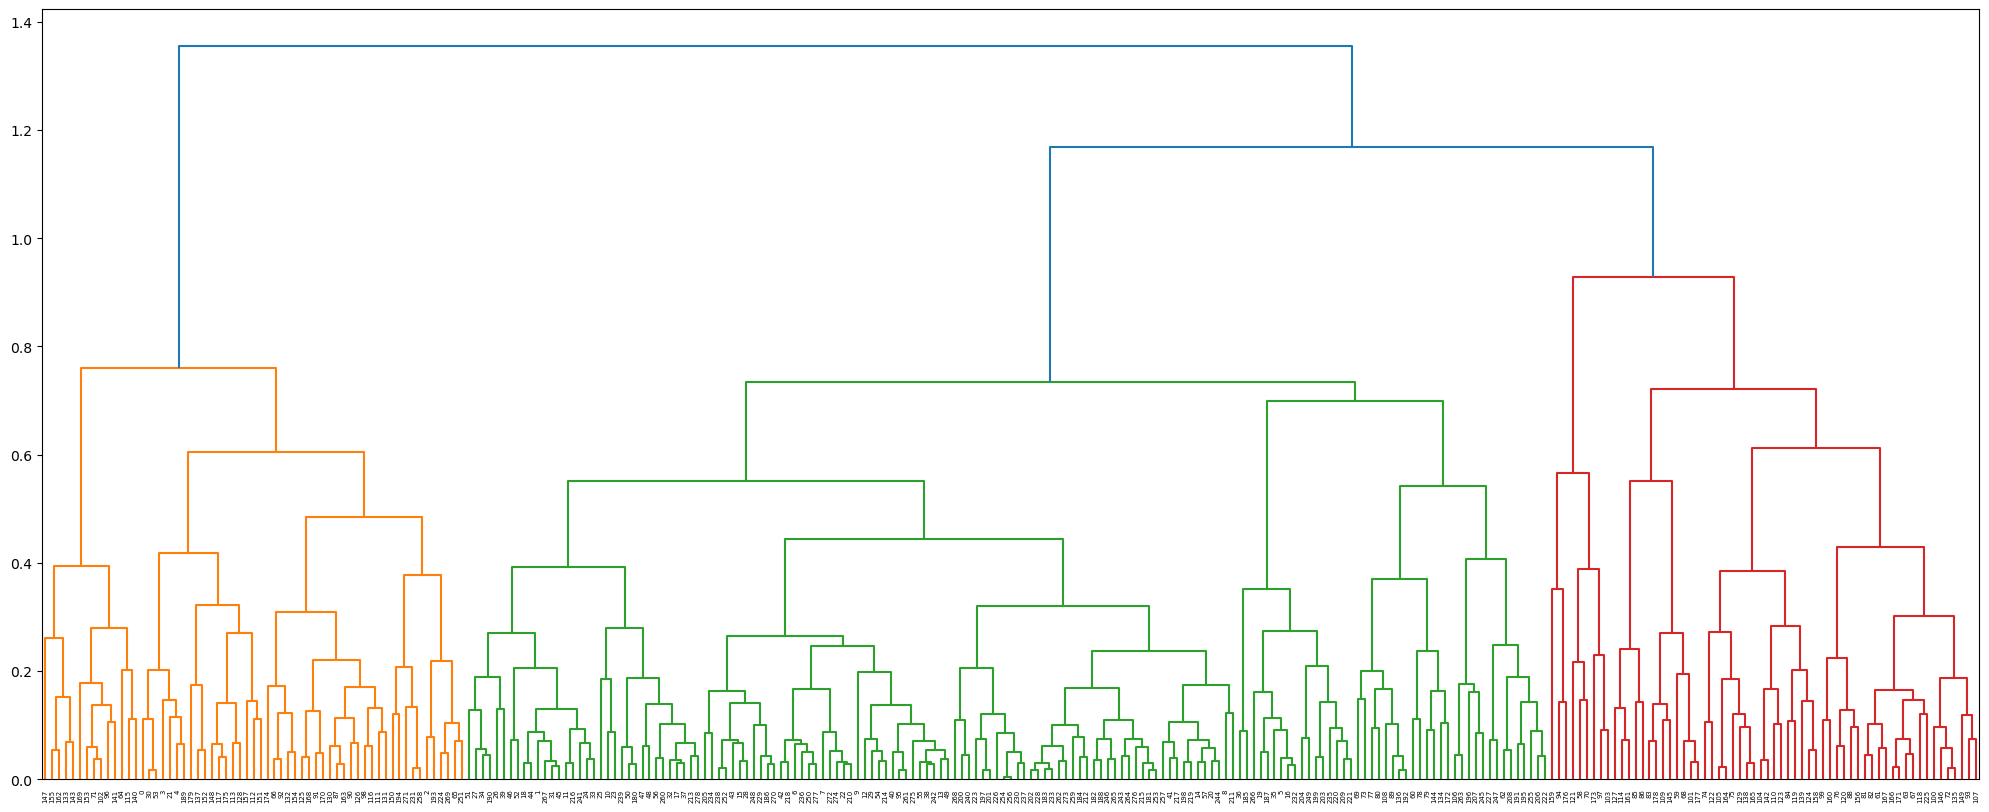

In [257]:
z2 = linkage(x2, method='complete')
plt.figure(figsize=(25, 10))
dendrogram(z2)
plt.show()

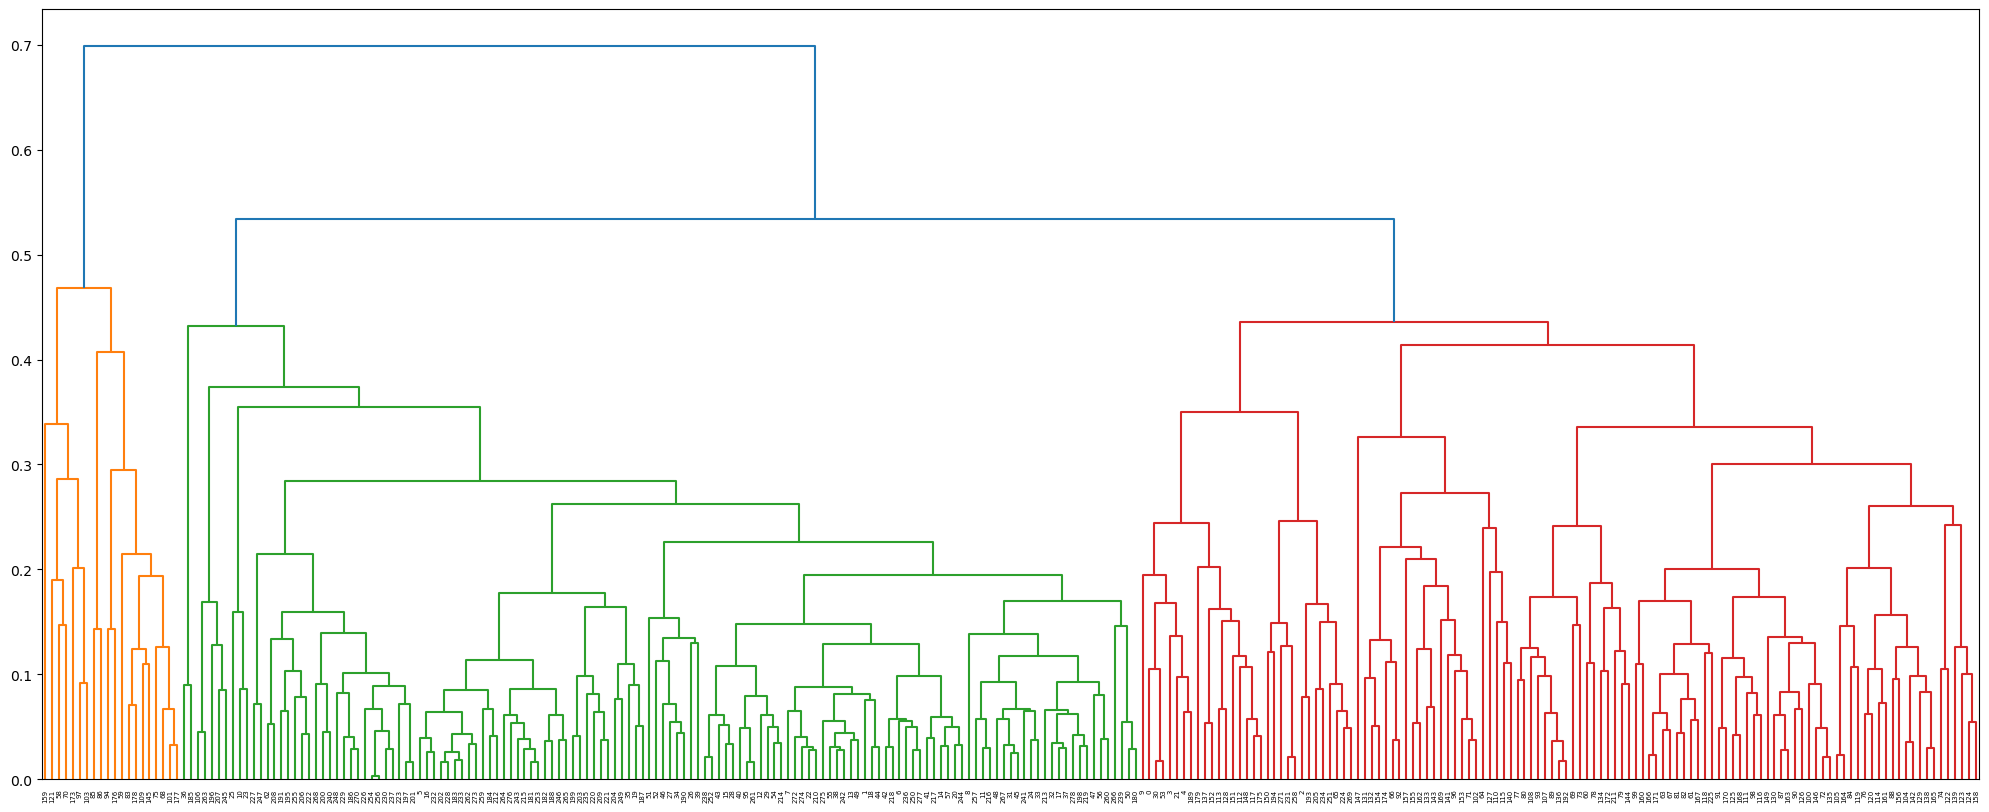

In [258]:
z3 = linkage(x2, method='average')
plt.figure(figsize=(25, 10))
dendrogram(z3)
plt.show()